## Decision trees are generally used for classification problems. But it can also be used for regression problems by grouping the dependent variable (continuous) into buckets. <code>DecisionTreeRegressor()</code> from the scikit-learn library helps us to use decision trees for regression problems. The implementation is similar to <code>DecisionTreeClassifier()</code>.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [4]:
cd ..

D:\Machine Learning


In [5]:
cd Machine Learning

[WinError 2] The system cannot find the file specified: 'Machine Learning'
D:\Machine Learning


In [6]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 06DA-8863

 Directory of D:\Machine Learning

05/17/2022  08:33 AM    <DIR>          .
05/17/2022  08:33 AM    <DIR>          ..
05/05/2022  12:05 PM    <DIR>          .ipynb_checkpoints
05/17/2022  09:33 AM    <DIR>          Boston Dataset
05/05/2022  12:55 PM             1,649 petrol_consumption.csv
05/05/2022  07:06 PM            11,259 petrol_consumption.xlsx
05/04/2022  10:02 PM            94,187 Student Score Prediction Based on Number of Hours they Studied.ipynb
05/11/2022  12:14 AM    <DIR>          Students record
04/30/2022  12:05 AM           185,227 Untitled.ipynb
05/10/2022  10:58 AM           101,544 Untitled1.ipynb
               5 File(s)        393,866 bytes
               5 Dir(s)  239,270,653,952 bytes free


In [7]:
cd Boston Dataset

D:\Machine Learning\Boston Dataset


In [8]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 06DA-8863

 Directory of D:\Machine Learning\Boston Dataset

05/17/2022  09:33 AM    <DIR>          .
05/17/2022  09:33 AM    <DIR>          ..
05/13/2022  07:55 PM    <DIR>          .ipynb_checkpoints
05/12/2022  10:18 PM            49,082 Housing.csv
05/17/2022  09:33 AM        14,953,717 Shirsh Verma-M3W2D3 - Assignment - Decision Trees.ipynb
               2 File(s)     15,002,799 bytes
               3 Dir(s)  239,270,653,952 bytes free


In [9]:
#loading dataset
data= pd.read_csv('Housing.csv',delim_whitespace=True,header=None,
                   names=['CRIM','ZN','INDUS','CHAS',
                          'NOX','RM','AGE','DIS','RAD','TAX',
                        'PTRATIO','B','LSTAT','MEDV' ] )

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
data.shape

(506, 14)

<AxesSubplot:>

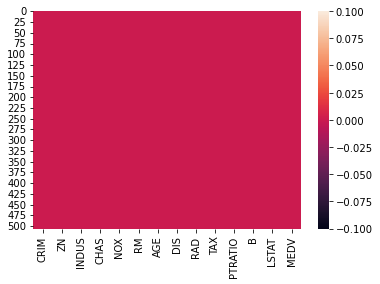

In [12]:
import seaborn as sns
sns.heatmap(data.isnull())

No nulls

In [13]:
#stats
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
#defining Independent and dependent variables
X= data.drop('MEDV',axis=1)
y= data['MEDV']

In [15]:
#splitting into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [16]:
print(X_train.shape)
print(X_test.shape)

(339, 13)
(167, 13)


In [17]:
#fitting
dtreg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10, random_state=0)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [18]:
#price predictions
y_pred = dtreg.predict(X_test)

In [19]:
y_pred[:10]

array([21.59193548, 21.59193548, 21.59193548, 21.59193548, 11.90740741,
       11.90740741, 21.59193548, 21.59193548, 21.59193548, 17.74027778])

In [20]:
y_test[:10].values

array([21.7, 18.5, 22.2, 20.4,  8.8,  8.3, 21.4, 23.6, 23.5, 19. ])

### Model evaluation

In [21]:
y_pred_train= dtreg.predict(X_train)

In [22]:
import math
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2 score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  

In [24]:
# Training dataset metrics
print_metrics(y_train, y_pred_train)

MSE is 11.657851152772055
RMSE is 3.4143595523570824
R2 score is 0.868401964853241
MAE is 2.6486151092393357
MAPE is 14.257131443636187


In [25]:
# Test dataset metrics
print_metrics(y_test, y_pred)

MSE is 21.854029654669034
RMSE is 4.674829371717115
R2 score is 0.7120130583952584
MAE is 3.1114314738421367
MAPE is 16.499978934295783


In [26]:
# Adjusted R2

def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [27]:
#train set
adjusted_r2(len(y_train),len(X), y_train, y_pred_train)


1.2647627135690747

In [28]:
#test
adjusted_r2(len(y_test),len(X), y_test, y_pred)

1.1406053891364327

##Hyper Parameter tuning

In [29]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [30]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dtreg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
tuning_model.fit(X,y)

In [31]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [32]:
# best model score
tuning_model.best_score_

-42.37507869137687

In [33]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',
                                         max_leaf_nodes=None,min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.1,splitter='best')

In [34]:
# fitting model

tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [35]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

In [36]:
# With hyperparameter tuned 
print_metrics(y_test,tuned_pred)

MSE is 32.95416198731295
RMSE is 5.740571573224478
R2 score is 0.5657382883688955
MAE is 3.683545121923072
MAPE is 18.470694456975007


##Conclusion:
If we observe the above metrics for both the models, We got good metric values(MSE 26) without hyperparameter tuning model compare to model with hyper parameter tuning.